In this notebook, we'll see the consequences of conditional stability for explicit time-stepping of the diffusion equation $\partial^2u/\partial x^2 = \partial u/\partial t$.

Let's make our usual $A \approx \partial^2/\partial x^2$ matrix:

In [1]:
N = 100
L = 1
Δx = L / (N+1)
A = sparse((-2*diagm(ones(N)) + diagm(ones(N-1),1) + diagm(ones(N-1),-1)) / (Δx)^2);

Now, the forward-difference time evolution of the diffusion equation $\partial^2u/\partial x^2 = \partial u/\partial t$ is just $u^n = (I + A\Delta t)^n u^0$.  The stability condition is $\Delta t = s \Delta x^2 / 2$ for $s ≤ 1$.   Let's try time-stepping for triangle-shaped initial condition as a function of $n$ and $s$.

(**Note**: computing the time-stepping by the explicit matrix exponentiation `(I + A*Δt)^n * u⁰` below is *not* how you would do time-evolution in practice.  Instead, you would multiply by `I + A*Δt`, or its equivalent, one step at a time.  I'm only using the exponentiation here because I want the plot to "jump" right to the solution at step `n`.)

In [2]:
using PyPlot, Interact

Interact.Slider{Float64}([Reactive.Input{Float64}] 1.0,"s",1.0,0.5:0.1:1.5)

Interact.Slider{Int64}([Reactive.Input{Int64}] 50,"n",50,0:100)

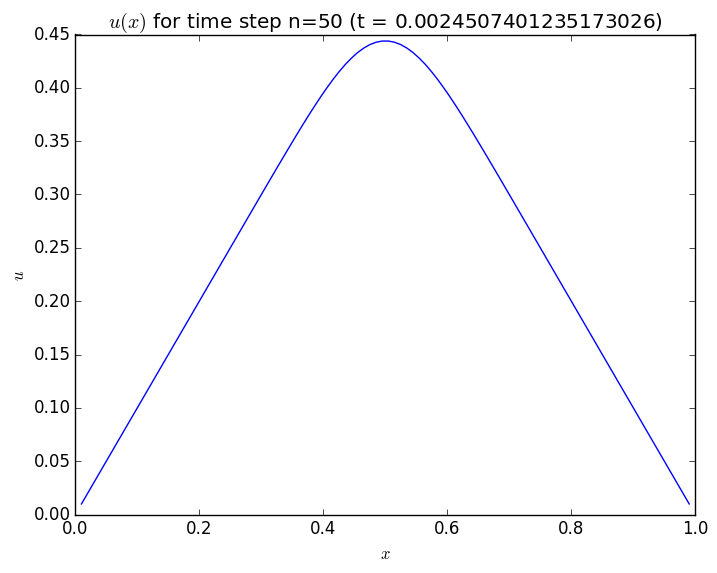

In [10]:
x = (1:N) * Δx
u⁰ = 0.5 - abs(x/L - 0.5)
f = figure()
@manipulate for s in 0.5:0.1:1.5, n in 0:100
    withfig(f) do
        Δt = s*Δx^2/2
        uⁿ = (I + A*Δt)^n * u⁰
        plot(x, uⁿ)
        xlabel(L"x")
        ylabel(L"u")
        title("\$u(x)\$ for time step n=$n (t = $(n*Δt))")
    end
end

Note that it blows up rather rapidly if `s > 1`!   And the fastest blowup, as predicted by Von Neumann analysis, is for the oscillating solution $u_m \approx (-1)^m$.